**Rufina M
22MIC0019
LAB14:CSI3007**

read from excel 

append to excel

read excel chunk by chunk

append numeric data to excel

append text data to excel

Write the output of a query into an excel


In [1]:
import pandas as pd
from openpyxl import load_workbook

file_path = "HR_Employee_Data.xlsx"

In [3]:
# 1. Read from Excel
df = pd.read_excel(file_path, sheet_name="HR_Employee_Data")
print("Data read from Excel:")
print(df.head())

Data read from Excel:
     Emp_Id  satisfaction_level  last_evaluation  number_project  \
0  IND02438                0.38             0.53               2   
1  IND28133                0.80             0.86               5   
2  IND07164                0.11             0.88               7   
3  IND30478                0.72             0.87               5   
4  IND24003                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                   157                   3              0     1   
1                   262                   6              0     1   
2                   272                   4              0     1   
3                   223                   5              0     1   
4                   159                   3              0     1   

   promotion_last_5years Department  salary  
0                      0      sales     low  
1                      0      sales  medium  
2                     

In [4]:
# 2. Append to Excel
# Appending means: read existing → concatenate → write back
new_data = pd.DataFrame({"Name": ["Alice", "Rufina"], "time_spend": [6, 7]})
with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="overlay") as writer:
    # Find last row of existing sheet
    last_row = writer.sheets["HR_Employee_Data"].max_row
    new_data.to_excel(writer, sheet_name="Sheet1", index=False, header=False, startrow=last_row)
print("Appended new data to Excel.")

Appended new data to Excel.


In [ ]:
# 3. Read Excel chunk by chunk

# Excel doesn't have chunked read like CSV, but we can simulate by slicing DataFrame
chunk_size = 3
df = pd.read_excel(file_path, sheet_name="HR_Employee_Data")
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    print(f"\nChunk {i//chunk_size + 1}:")
    print(chunk)

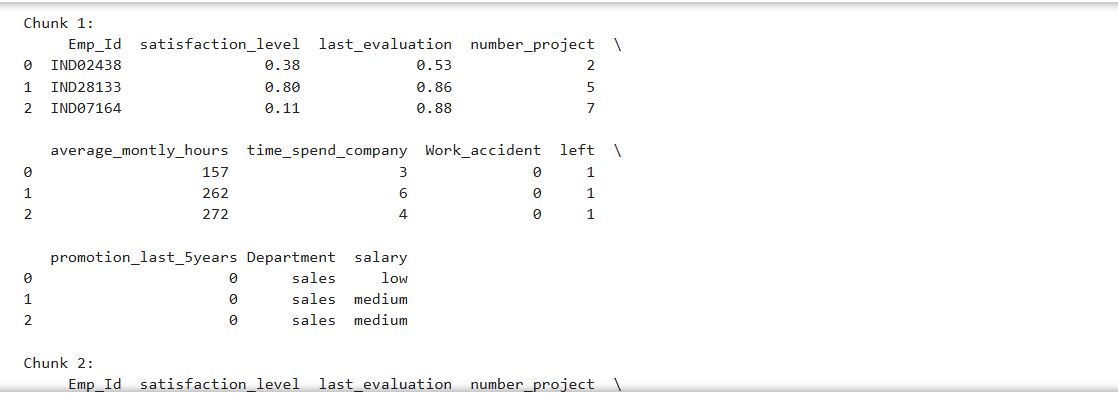

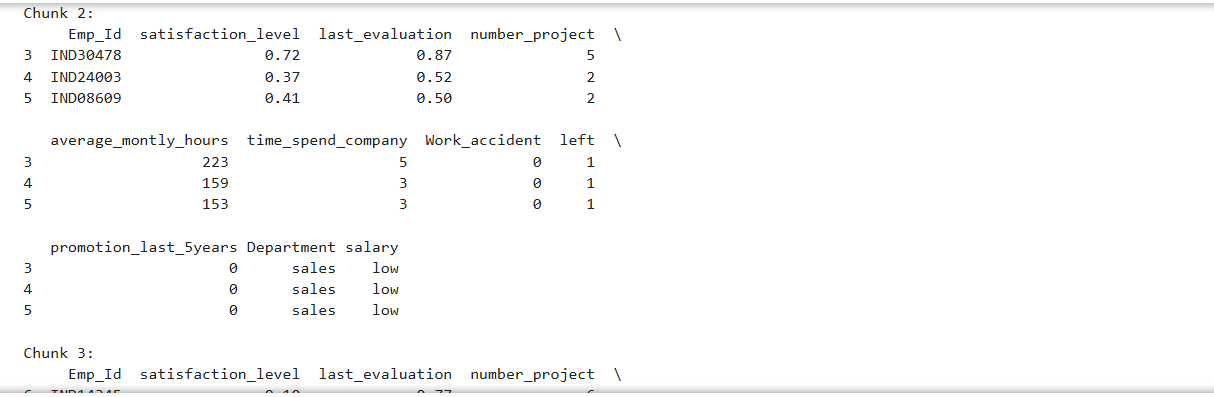


In [6]:
# 4. Append numeric data to Excel
numeric_data = pd.DataFrame({"A": [1, 2, 3], "B": [4.5, 5.6, 6.7]})
with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="overlay") as writer:
    last_row = writer.sheets["Sheet1"].max_row
    numeric_data.to_excel(writer, sheet_name="HR_Employee_Data", index=False, header=False, startrow=last_row)
print("Numeric data appended.")

Numeric data appended.


In [13]:
# 5. Append text data to Excel
text_data = pd.DataFrame({"Text": ["Hello", "World"], "Category": ["Greeting", "Noun"]})
with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="overlay") as writer:
    last_row = writer.sheets["HR_Employee_Data"].max_row
    text_data.to_excel(writer, sheet_name="HR_Employee_Data", index=False, header=False, startrow=last_row)
print("Text data appended.")

Text data appended.


In [14]:
# 6. Write output of a query into Excel
# Example query: filter rows
df = pd.read_excel(file_path, sheet_name="HR_Employee_Data")
print(df.columns.tolist())
query_result = df.query("time_spend_company > 6")

with pd.ExcelWriter(file_path, mode="a", engine="openpyxl") as writer:
    query_result.to_excel(writer, sheet_name="Query_Result", index=False)
print("Query output written into new sheet.")

['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
Query output written into new sheet.


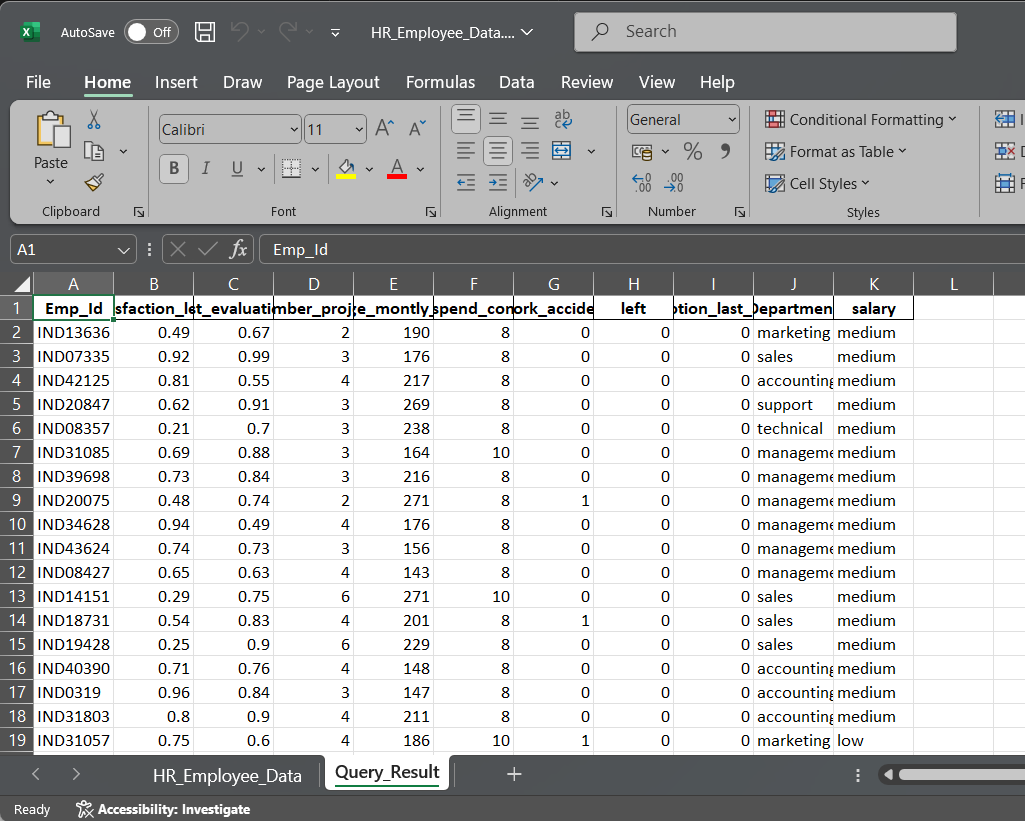

**CSV**

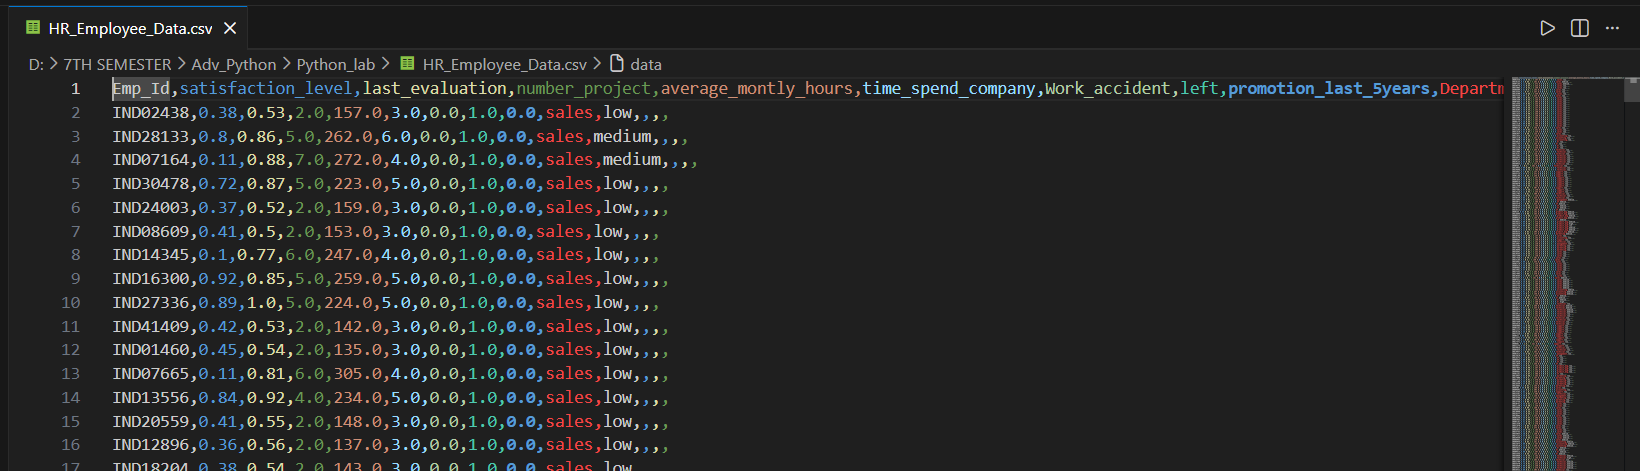

In [1]:
import pandas as pd

csv_path = "HR_Employee_Data.csv"

# 1. Read from CSV
df = pd.read_csv(csv_path)
print("Data read from CSV:")
print(df.head())

Data read from CSV:
     Emp_Id satisfaction_level  last_evaluation  number_project  \
0  IND02438               0.38             0.53             2.0   
1  IND28133                0.8             0.86             5.0   
2  IND07164               0.11             0.88             7.0   
3  IND30478               0.72             0.87             5.0   
4  IND24003               0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                 157.0                 3.0            0.0   1.0   
1                 262.0                 6.0            0.0   1.0   
2                 272.0                 4.0            0.0   1.0   
3                 223.0                 5.0            0.0   1.0   
4                 159.0                 3.0            0.0   1.0   

   promotion_last_5years Department  salary  
0                    0.0      sales     low  
1                    0.0      sales  medium  
2                    0.0      

In [2]:
# 2. Append to CSV
new_data = pd.DataFrame({
    "Emp_ID": [999],
    "Name": ["New Employee"],
    "Salary": [75000]
})

df_existing = pd.read_csv(csv_path)
updated_df = pd.concat([df_existing, new_data], ignore_index=True)

updated_df.to_csv(csv_path, index=False)
print("Appended new data to CSV.")


Appended new data to CSV.


In [3]:
# 3. Read CSV chunk by chunk
chunk_size = 10  # example

for i, chunk in enumerate(pd.read_csv(csv_path, chunksize=chunk_size), start=1):
    print(f"\nChunk {i}:")
    print(chunk)



Chunk 1:
     Emp_Id  satisfaction_level  last_evaluation  number_project  \
0  IND02438                0.38             0.53             2.0   
1  IND28133                0.80             0.86             5.0   
2  IND07164                0.11             0.88             7.0   
3  IND30478                0.72             0.87             5.0   
4  IND24003                0.37             0.52             2.0   
5  IND08609                0.41             0.50             2.0   
6  IND14345                0.10             0.77             6.0   
7  IND16300                0.92             0.85             5.0   
8  IND27336                0.89             1.00             5.0   
9  IND41409                0.42             0.53             2.0   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                 157.0                 3.0            0.0   1.0   
1                 262.0                 6.0            0.0   1.0   
2                 272.0              

In [4]:
# 4. Append numeric data to CSV
numeric_data = pd.DataFrame({
    "Emp_ID": [1000, 1001],
    "Age": [34, 29],
    "Salary": [58000, 64000]
})

df_existing = pd.read_csv(csv_path)
updated_df = pd.concat([df_existing, numeric_data], ignore_index=True)

updated_df.to_csv(csv_path, index=False)
print("Numeric data appended to CSV.")


Numeric data appended to CSV.


**JSON**

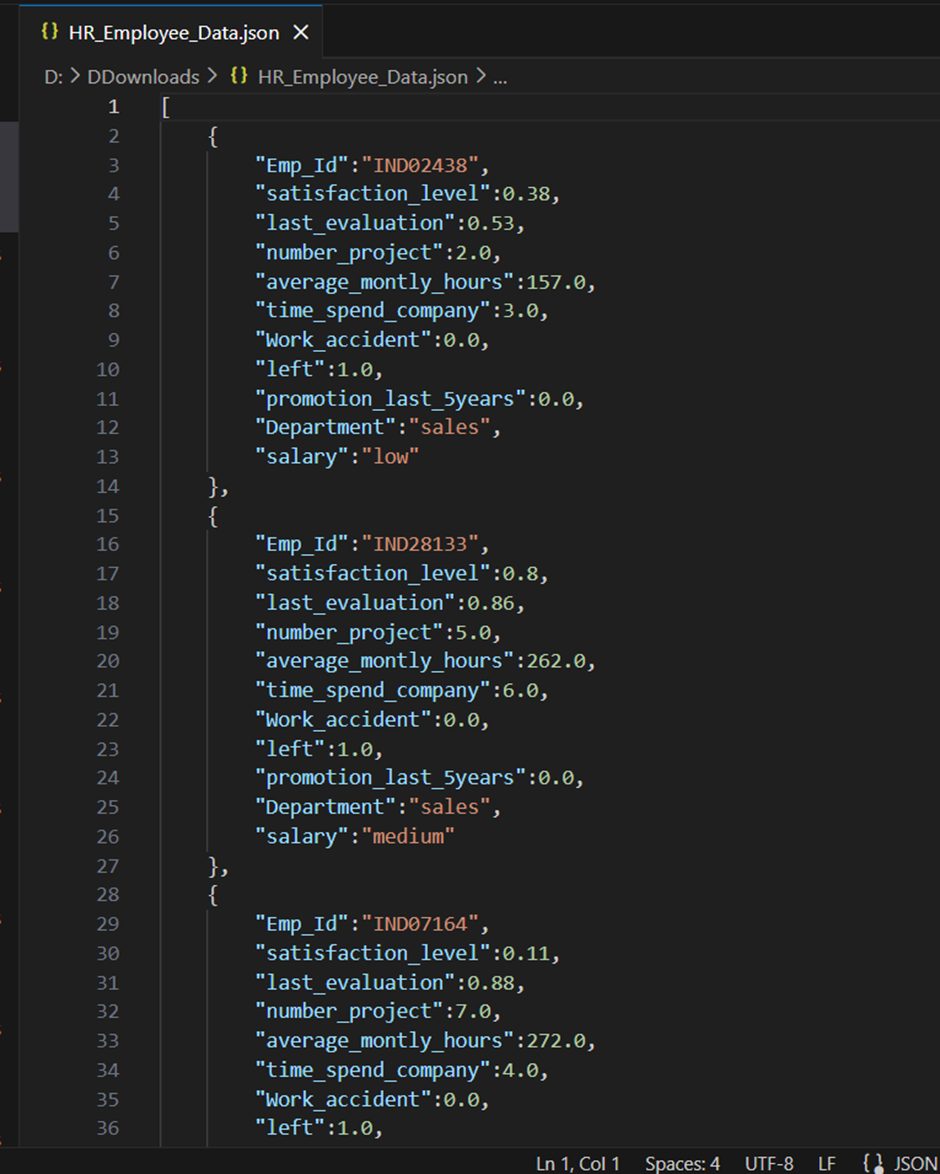

In [5]:
import pandas as pd

json_path = "HR_Employee_Data.json"

# 1. Read JSON
df = pd.read_json(json_path)
print("Data read from JSON:")
print(df.head())


Data read from JSON:
     Emp_Id satisfaction_level  last_evaluation  number_project  \
0  IND02438               0.38             0.53             2.0   
1  IND28133                0.8             0.86             5.0   
2  IND07164               0.11             0.88             7.0   
3  IND30478               0.72             0.87             5.0   
4  IND24003               0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                 157.0                 3.0            0.0   1.0   
1                 262.0                 6.0            0.0   1.0   
2                 272.0                 4.0            0.0   1.0   
3                 223.0                 5.0            0.0   1.0   
4                 159.0                 3.0            0.0   1.0   

   promotion_last_5years Department  salary  
0                    0.0      sales     low  
1                    0.0      sales  medium  
2                    0.0     

In [6]:
# 2. Append to JSON
new_data = pd.DataFrame({
    "Emp_ID": [999],
    "Name": ["New Employee"],
    "Salary": [75000]
})

df_existing = pd.read_json(json_path)
updated_df = pd.concat([df_existing, new_data], ignore_index=True)

updated_df.to_json(json_path, orient="records", indent=4)
print("Appended new data to JSON.")


Appended new data to JSON.


In [7]:
# 3. Read JSON in chunks (manual simulation)
df = pd.read_json(json_path)

chunk_size = 10

for i in range(0, len(df), chunk_size):
    chunk = df[i:i+chunk_size]
    print(f"\nChunk {i//chunk_size + 1}:")
    print(chunk)



Chunk 1:
     Emp_Id satisfaction_level  last_evaluation  number_project  \
0  IND02438               0.38             0.53             2.0   
1  IND28133                0.8             0.86             5.0   
2  IND07164               0.11             0.88             7.0   
3  IND30478               0.72             0.87             5.0   
4  IND24003               0.37             0.52             2.0   
5  IND08609               0.41             0.50             2.0   
6  IND14345                0.1             0.77             6.0   
7  IND16300               0.92             0.85             5.0   
8  IND27336               0.89             1.00             5.0   
9  IND41409               0.42             0.53             2.0   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                 157.0                 3.0            0.0   1.0   
1                 262.0                 6.0            0.0   1.0   
2                 272.0                 4.0     

In [8]:
# 4. Append numeric data to JSON
numeric_data = pd.DataFrame({
    "Emp_ID": [1000, 1001],
    "Age": [34, 29],
    "Salary": [58000, 64000]
})

df_existing = pd.read_json(json_path)
updated_df = pd.concat([df_existing, numeric_data], ignore_index=True)

updated_df.to_json(json_path, orient="records", indent=4)
print("Numeric data appended to JSON.")


Numeric data appended to JSON.
